In [8]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [9]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import vg_pricing as vg
from pars_range import Range, ParsRange

pl.rcParams["figure.figsize"] = (15, 10)

In [10]:
pl.rcParams["figure.figsize"] = (15, 10)

In [11]:
try:
    data, info = dh.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = dh.read_data("SPH2_031612.csv")

In [12]:

data, info = dh.prepare_data(data=data, info=info)

In [13]:
day = 0
rate = .03
q = rate
maturity = info[day].mat / len(info)
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)

In [14]:
nu_range = Range(min=.01, max=1, num=1)
theta_range = Range(min=-.5, max=.5, num=2)
sigma_range = Range(min=.05, max=.25, num=10)

pars = ParsRange(model="vg", center=(1.417, .0718, 0.5), widths=(.4, .02, .1), dots=64)
pars.nu_range = nu_range
pars.theta_range = theta_range
pars.sigma_range = sigma_range
print(pars.nu_range.num)
print(pars.theta_range.num)
print(pars.sigma_range.num)


1
2
10


In [9]:
predicted = []
for params in pars:
    predicted.append(strikes)
    predicted.append(vg.price_vg(pars=params, args=args))
    predicted.append("grey")
# predicted

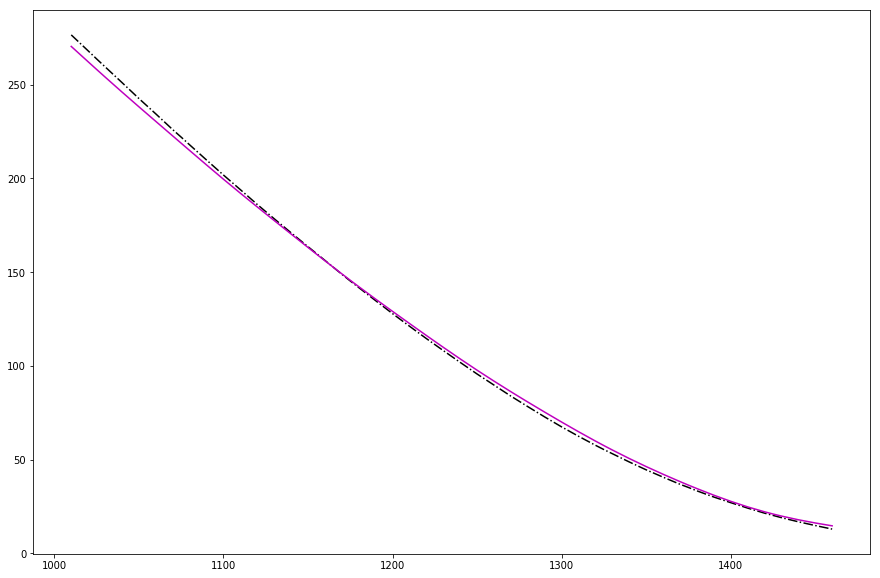

In [10]:
p = pl.plot(  # *predicted,
            strikes, prices, "k-.",
            #strikes, vg.price_vg(pars=(1.9242924, 0.85896911, 0.65368481), args=args), "b",
            strikes, vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args), "m"#,
            #strikes, vg.price_vg(pars=(1.92531088, 0.99771722, 0.28334152), args=args), "g"
)

In [14]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [11]:
import modeling as mo
from structs import EvalArgs


res1 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='MAE', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'], disp=True)
res1

KeyboardInterrupt: 

In [14]:
res2 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='MAR', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'])
res2

     fun: 3.55321287068541e-15
 message: 'Optimization terminated successfully.'
    nfev: 634
     nit: 13
 success: True
       x: array([ 1.92531088,  0.99771722,  0.28334152])

In [15]:
res3 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='RMR', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'])
res3

     fun: 3.55321287068541e-15
 message: 'Optimization terminated successfully.'
    nfev: 634
     nit: 13
 success: True
       x: array([ 1.92531088,  0.99771722,  0.28334152])

In [10]:
print(vg.price_vg(pars=(1.9242924, 0.85896911, 0.65368481), args=args), "b",
      vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args), "m",
      vg.price_vg(pars=(1.92531088, 0.99771722, 0.28334152), args=args), "g")


[ -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15] b [ 270.29315305  262.17435695  258.13810714  254.

In [16]:
%load_ext autoreload
%autoreload

In [17]:
mo.par_bounds

NameError: name 'mo' is not defined

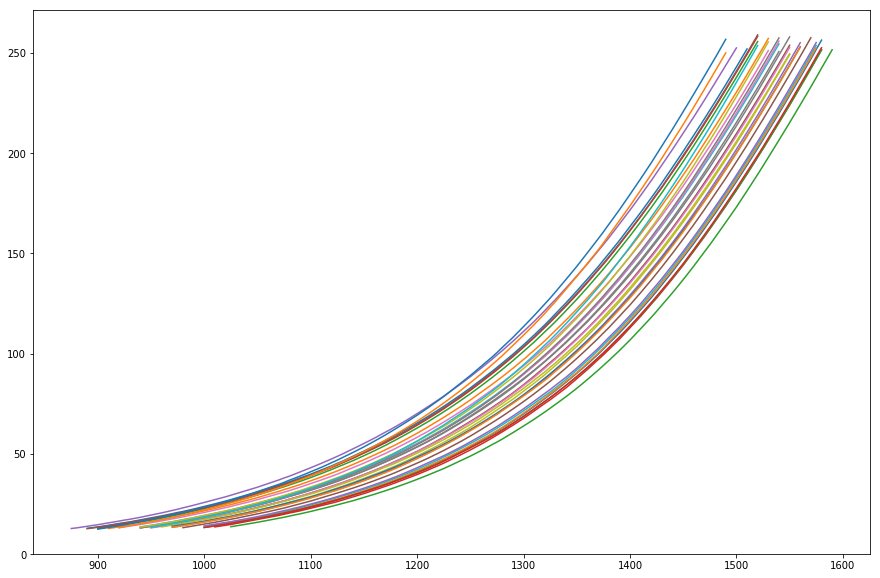

In [50]:
is_call = False
for d in range(0, 32):
    pl.plot(data.strikes[is_call][d], data.prices[is_call][d])

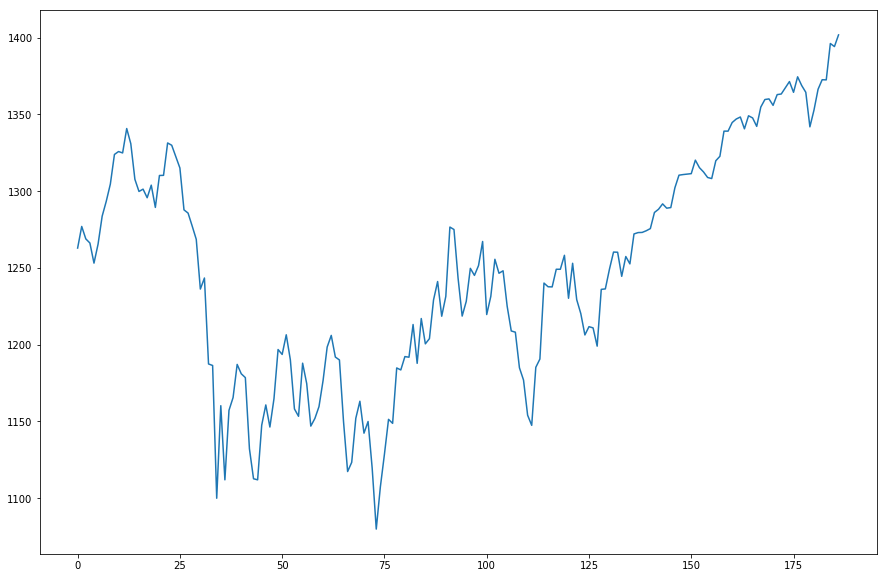

In [48]:
spots = [info[day].spot for day in range(187)]
pl.plot(spots)

In [34]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [15]:
import data_helpers as dh
import numpy as np
import sklearn.decomposition as de


dh = reload(dh)


filename1 = dh.get_filename(model='vg', metric='MAE', best=True, is_call=True)
centers1 = np.array(list(dh.extract_centers(filename1)))
pca1 = de.PCA(n_components=2)
pca1.fit(centers1)
print(pca1.explained_variance_ratio_)
components1 = pca1.components_

filename2 = dh.get_filename(model='vg', metric='MAE', best=True, is_call=False)
centers2 = np.array(list(dh.extract_centers(filename2)))
pca2 = de.PCA(n_components=2)
pca2.fit(centers2)
print(pca2.explained_variance_ratio_)
components2 = pca2.components_

[ 0.90494248  0.0940576 ]
[ 0.89768208  0.09890012]


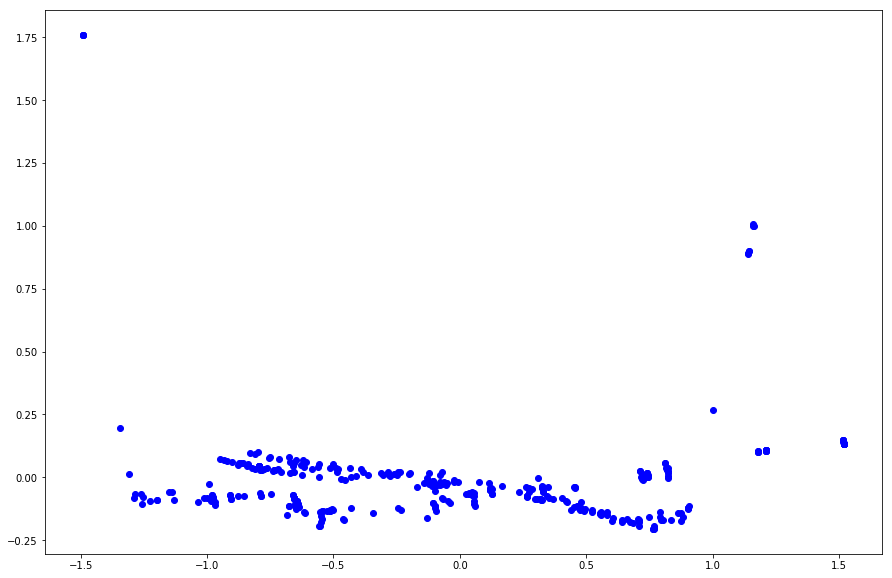

In [21]:
centers_2d_1 = pca1.fit_transform(centers1)
centers_2d_2 = pca2.fit_transform(centers2)
#dh.plot_dots(centers_2d_1, centers_2d_2)
dh.plot_and_color_2d_params(model='vg', dots=centers_2d_1, 
                            factors=pca1.components_, means=pca1.mean_,
                            bounds_only=False)
dh.plot_and_color_2d_params(model='vg', dots=centers_2d_2, 
                            factors=pca2.components_, means=pca2.mean_,
                            bounds_only=False)

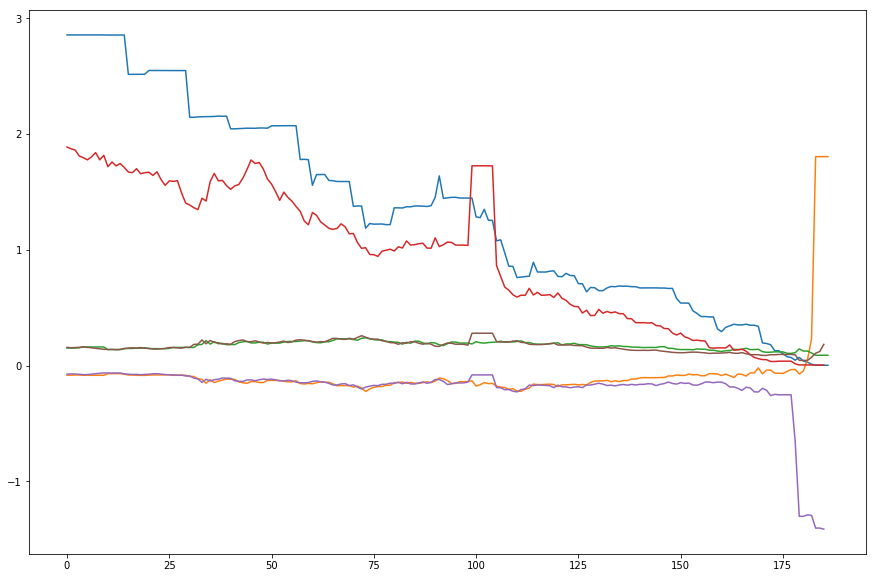

In [21]:
pl.plot(centers1[:, 0])
pl.plot(centers1[:, 1])
pl.plot(centers1[:, 2])

pl.plot(centers2[:, 0])
pl.plot(centers2[:, 1])
pl.plot(centers2[:, 2])

In [22]:
import data_helpers as dh
with open('params/pca_vg.txt', 'w') as f:
    f.writelines([f"{-1.8}, {1.8}, {-0.35}, {0.35}\n",
                  f"{dh.array2str(components1)}\n",
                  f"{dh.array2str(pca1.mean_)}\n",
                  f"{-1.2}, {1.2}, {-0.35}, {0.35}\n",
                  f"{dh.array2str(components2)}\n",
                  f"{dh.array2str(pca2.mean_)}\n"])

In [23]:
components1

array([[ 0.99598468, -0.08863   ,  0.01261918],
       [ 0.08918315,  0.99457367, -0.05356845]])

In [24]:
centers1 - (centers_2d_1 @ components1 + pca1.mean_)
pass

In [25]:
components1 @ components1.transpose() @ components1 - components1

array([[  6.66133815e-16,  -5.55111512e-17,   8.67361738e-18],
       [  5.55111512e-17,   6.66133815e-16,  -3.46944695e-17]])

In [50]:
grid = dh.grid(-1.2, 1.2, -0.35, 0.35)

In [51]:
restored = np.array(list(map(
    lambda dot: dot @ components1 + pca1.mean_,
    grid
)))

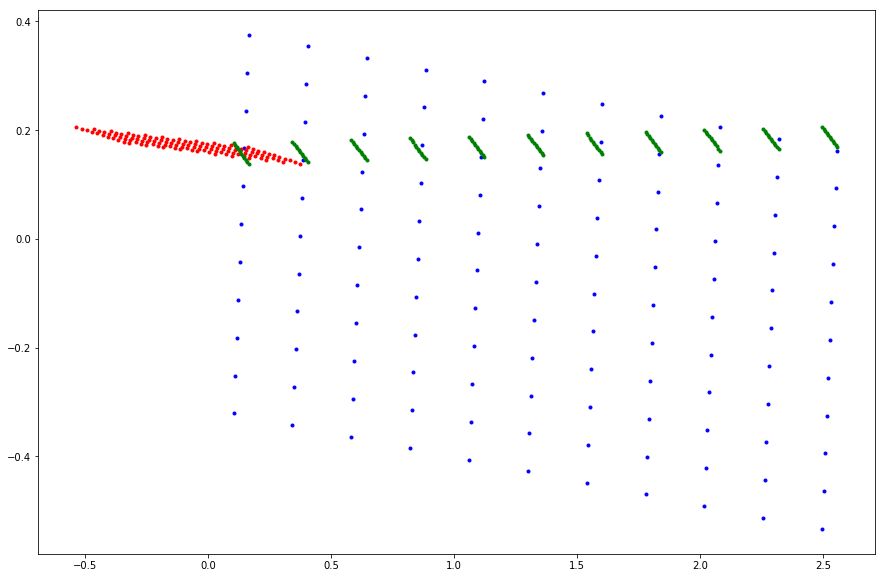

In [58]:
pl.plot(restored[:, 0], restored[:, 1], 'b.')
pl.plot(restored[:, 1], restored[:, 2], 'r.')
pl.plot(restored[:, 0], restored[:, 2], 'g.')

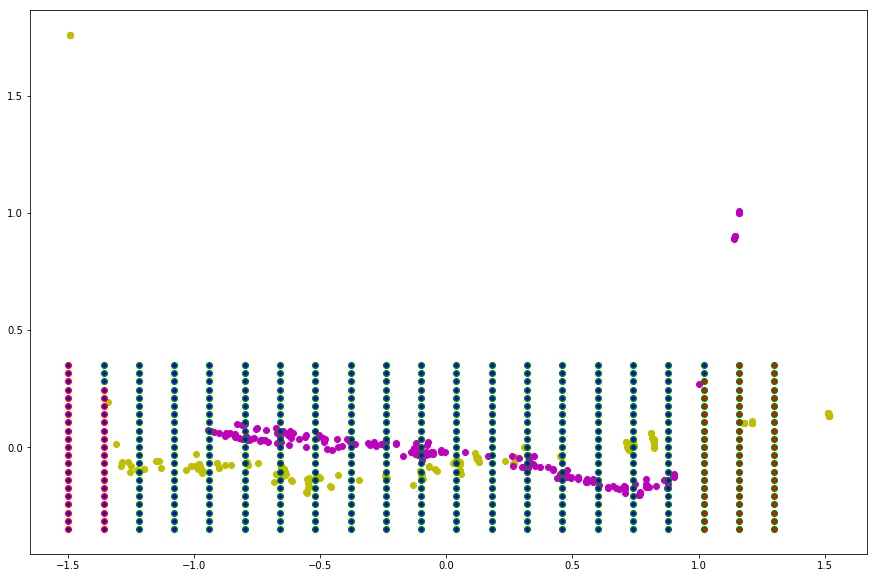

In [32]:
common_grid = np.array(dh.grid(-1.5, 1.3, -.35, .35, n=20))

dh.plot_dots(centers_2d_1, centers_2d_2, style1='yo', style2='mo')
dh.plot_and_color_2d_params(model='vg', dots=common_grid, 
                            factors=pca1.components_, means=pca1.mean_, 
                            style_good='go', style_bad='ro', bounds_only=False)
dh.plot_and_color_2d_params(model='vg', dots=common_grid, 
                            factors=pca2.components_, means=pca2.mean_,
                            style_good='b.', style_bad='r.', bounds_only=False)
